<a href="https://colab.research.google.com/github/samer-glitch/Federated-Governance-and-Provenance-Scoring-for-Trustworthy-AI-A-Metadata-Ledger-Approach/blob/main/Target_class_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import io
import numpy as np
from collections import defaultdict

print("⬆️ Upload diabetes.csv")
uploaded = files.upload()
fname = next(iter(uploaded))
raw_df = pd.read_csv(io.BytesIO(uploaded[fname]))

# Preprocessing function (ensure this matches your actual preprocessing)
def preprocess_diabetes(df):
    df = df.copy()
    # Your existing preprocessing steps here...
    df['readmitted'] = df['readmitted'].map({'NO':0, '<30':1, '>30':2})
    return df

processed_df = preprocess_diabetes(raw_df)

# 1. Overall readmission rates
total_counts = processed_df['readmitted'].value_counts(normalize=True).mul(100).round(1)
print("\n=== Overall Readmission Rates ===")
print(f"• <30 days: {total_counts.get(1, 0)}%")
print(f"• >30 days: {total_counts.get(2, 0)}%")
print(f"• No readmission: {total_counts.get(0, 0)}%")

# 2. Shard-level analysis for different client counts
def analyze_shard_skew(df, k_values=[5, 10, 15, 20]):
    results = defaultdict(dict)
    global_rate = df['readmitted'].eq(1).mean() * 100  # <30 days rate

    for k in k_values:
        # Create shards using Dirichlet distribution for non-IID split
        fractions = np.random.dirichlet([1.5]*k)
        shards = np.split(df.sample(frac=1, random_state=42),
                         (fractions.cumsum() * len(df)).astype(int)[:-1])

        rates = []
        for shard in shards:
            rate = shard['readmitted'].eq(1).mean() * 100
            rates.append(rate)

        results[k] = {
            'min': min(rates),
            'max': max(rates),
            'min_diff': min(rates) - global_rate,
            'max_diff': max(rates) - global_rate,
            'range': f"{min(rates):.2f}% to {max(rates):.2f}%",
            'deviation': f"{-abs(min(rates)-global_rate):.2f} pp to {max(rates)-global_rate:.2f} pp"
        }

    return global_rate, results

global_rate, shard_results = analyze_shard_skew(processed_df)

print(f"\n=== Shard-level Analysis (Global <30 days rate: {global_rate:.1f}%) ===")
for k, stats in shard_results.items():
    print(f"\nK={k}:")
    print(f"• Range: {stats['range']}")
    print(f"• Deviation: {stats['deviation']}")
    print(f"  (min: {stats['min']:.2f}%, {-abs(stats['min_diff']):.2f} pp below)")
    print(f"  (max: {stats['max']:.2f}%, {stats['max_diff']:.2f} pp above)")

# Format for LaTeX
print("\n=== LaTeX Ready Output ===")
print("\\begin{itemize}")
print(f"  \\item \\textbf{{Overall readmission rates:}}  ")
print("    Computed over all $N=101\\,766$ records:")
print("    \\begin{itemize}")
print(f"      \\item $<30$ days: {total_counts.get(1, 0)}\%  ")
print(f"      \\item $>30$ days: {total_counts.get(2, 0)}\%  ")
print(f"      \\item No readmission: {total_counts.get(0, 0)}\%")
print("    \\end{itemize}")

print("\n  \\item \\textbf{{Shard-level \"$<30$ days\" rates:}}  ")
k20 = shard_results[20]
print(f"    Calculated for each shard and compared to the global mean ({global_rate:.1f}\%):")
print(f"    \\[")
print(f"      \\min = {k20['min']:.2f}\%\\quad (\\!{k20['min_diff']:.2f}\\text{{ pp}}),\\qquad")
print(f"      \\max = {k20['max']:.2f}\%\\quad (+{k20['max_diff']:.2f}\\text{{ pp}})")
print("    \\]")

print("\n  \\item \\textbf{{Variation by client count:}}")
print("    \\begin{itemize}")
for k in [5, 10, 15, 20]:
    s = shard_results[k]
    print(f"      \\item $K={k}$: shard rates spanned {s['min']:.2f}\%–{s['max']:.2f}\%  ")
    print(f"            (deviation {s['min_diff']:.2f} pp to $+{s['max_diff']:.2f}$ pp)  ")
print("    \\end{itemize}")
print("\\end{itemize}")

⬆️ Upload diabetes.csv


Saving diabetic_data.csv to diabetic_data (2).csv

=== Overall Readmission Rates ===
• <30 days: 11.2%
• >30 days: 34.9%
• No readmission: 53.9%


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



=== Shard-level Analysis (Global <30 days rate: 11.2%) ===

K=5:
• Range: 10.74% to 11.44%
• Deviation: -0.42 pp to 0.28 pp
  (min: 10.74%, -0.42 pp below)
  (max: 11.44%, 0.28 pp above)

K=10:
• Range: 10.52% to 11.65%
• Deviation: -0.64 pp to 0.49 pp
  (min: 10.52%, -0.64 pp below)
  (max: 11.65%, 0.49 pp above)

K=15:
• Range: 9.91% to 12.27%
• Deviation: -1.25 pp to 1.11 pp
  (min: 9.91%, -1.25 pp below)
  (max: 12.27%, 1.11 pp above)

K=20:
• Range: 10.34% to 13.74%
• Deviation: -0.82 pp to 2.58 pp
  (min: 10.34%, -0.82 pp below)
  (max: 13.74%, 2.58 pp above)

=== LaTeX Ready Output ===
\begin{itemize}
  \item \textbf{Overall readmission rates:}  
    Computed over all $N=101\,766$ records:
    \begin{itemize}
      \item $<30$ days: 11.2\%  
      \item $>30$ days: 34.9\%  
      \item No readmission: 53.9\%
    \end{itemize}

  \item \textbf{{Shard-level "$<30$ days" rates:}}  
    Calculated for each shard and compared to the global mean (11.2\%):
    \[
      \min = 10.34\%\

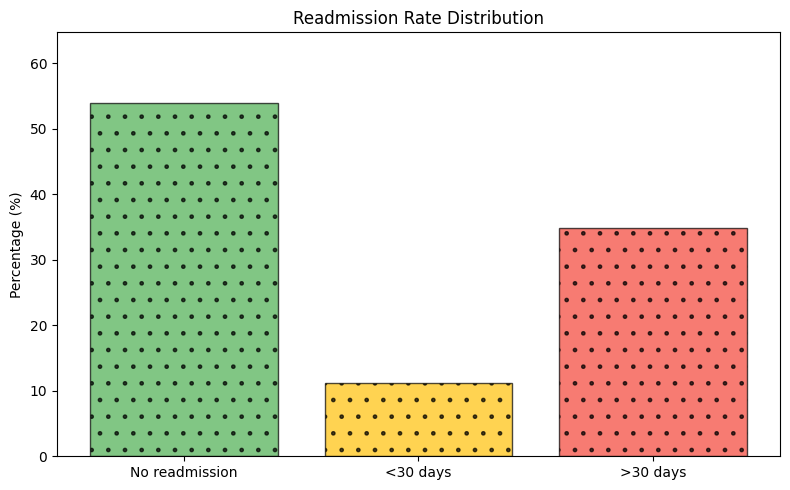

In [ ]:
import matplotlib.pyplot as plt

# Compute percentage rates
rates = (
    processed_df['readmitted']
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
)

# Map codes → labels and order them
label_map = {0: 'No readmission', 1: '<30 days', 2: '>30 days'}
rates = rates.rename(index=label_map).reindex(['No readmission', '<30 days', '>30 days'])

# Define colors and an alpha for shading
colors = ['#4CAF50', '#FFC107', '#F44336']  # green, amber, red
alpha = 0.7

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(rates.index, rates.values, color=colors, alpha=alpha, edgecolor='black')

# Optionally add hatches for extra texture
hatches = ['.', '.', '.']
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

# Labels and styling
plt.ylabel('Percentage (%)')
plt.title('Readmission Rate Distribution')
plt.ylim(0, rates.values.max() * 1.2)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
<ipython-input-19-b6c134eb2c1d>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


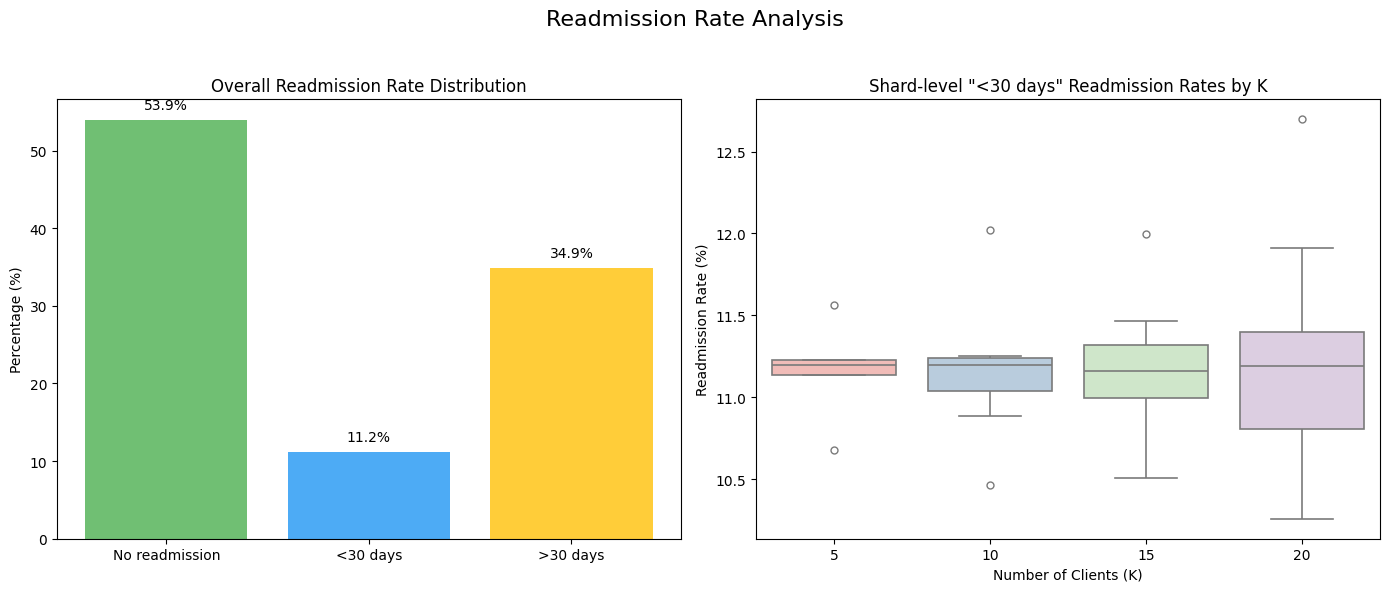

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = raw_df.copy()
def preprocess_diabetes(df):
    df = df.copy()
    df.columns = df.columns.str.lower().str.replace('[^a-z0-9]+', '_', regex=True)
    df.replace('?', np.nan, inplace=True)
    if 'age' in df and df['age'].dtype == object:
        df['age'] = df['age'].str.extract('(\d+)').astype(float)
    df['readmitted'] = df['readmitted'].map({'NO':0,'<30':1,'>30':2})
    return df

processed_df = preprocess_diabetes(df)

# Compute overall readmission rates
overall_rates = processed_df['readmitted'].value_counts(normalize=True).mul(100).round(1)
overall_labels = ['No readmission', '<30 days', '>30 days']
overall_values = [overall_rates.get(0, 0), overall_rates.get(1, 0), overall_rates.get(2, 0)]

# Compute shard-level "<30 days" rates for different K
shard_rates = []
for K in [5, 10, 15, 20]:
    shards = np.array_split(
        processed_df.sample(frac=1, random_state=42).reset_index(drop=True),
        K
    )
    rates_k = [(shard['readmitted'] == 1).mean() * 100 for shard in shards]
    shard_rates.append(pd.DataFrame({
        'K': [K] * len(rates_k),
        'Rate': rates_k
    }))
shard_rates_df = pd.concat(shard_rates, ignore_index=True)

# Plot combined figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: overall distribution
axes[0].bar(overall_labels, overall_values, color=['#4CAF50', '#2196F3', '#FFC107'], alpha=0.8)
axes[0].set_title('Overall Readmission Rate Distribution')
axes[0].set_ylabel('Percentage (%)')
for i, (label, value) in enumerate(zip(overall_labels, overall_values)):
    axes[0].text(i, value + 1, f'{value}%', ha='center', va='bottom')

# Right: shard-level variation
sns.boxplot(
    x='K', y='Rate', data=shard_rates_df,
    palette='Pastel1', ax=axes[1], fliersize=5, linewidth=1.2
)
axes[1].set_title('Shard-level "<30 days" Readmission Rates by K')
axes[1].set_xlabel('Number of Clients (K)')
axes[1].set_ylabel('Readmission Rate (%)')

plt.suptitle('Readmission Rate Analysis', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

